In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 4: Trump, Twitter, and Text

## Due Date: Thursday 10/08, 11:59 pm PST

Welcome to the fourth homework assignment of Data 100/200! In this assignment, we will work with Twitter data in order to analyze Donald Trump's tweets.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

In [77]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

### Score Breakdown

Question | Points
--- | ---
0 | 1
1 | 2
2 | 1
3 | 2
4a | 1
4b | 2
4c | 2
4d | 1
5a | 1
5b | 1
5c | 1
5d | 1
5e | 1
5f | 2
5g | 2
5h | 1
6a | 1
6b | 1
7a | 2
7b | 1
Total | 27

## Before we start ##
All data is made from real-world phenomena, be it the movement of the planets, animal behavior, or human bodies and activities. Working with data always has a bearing back on how human beings know and act in the world. The dataset that you're about to work with in this homework consists of a compilation of President Trump's Tweets. It's important to acknowledge that these Tweets are more than just data -- they're the means by which the President expresses his opinions, performs public and foreign policy, and shapes the lives of people in the US and all over the world. More fundamentally, these Tweets are a powerful form of speech that is particularly significant on the eve of the 2020 US Presidential Election. We recognize that working with this data now, even in the context of a technical exercise, is not a neutral activity and may create difficult feelings in students. We encourage you to observe what you may be experiencing and invite you to consider these dimensions of data science work alongside your technical lessons and we're glad to discuss these issues together in section.

## Disclaimer about `sns.distplot()`

This homework was designed for a slightly older version of seaborn, which does not support the new `displot` method taught in Lecture 9. Instead, in this homework we will heavily rely on `distplot` (with a `t`). As you may have noticed in lab 5, use of the `distplot` function triggers a deprecation warning to notify the user that they should replace all deprecated functions with the updated version. Generally, warnings should not be suppressed but we will do so in this assignment to avoid cluttering.

See the seaborn documentation on [distributions](https://seaborn.pydata.org/tutorial/distributions.html) and [functions](https://seaborn.pydata.org/tutorial/function_overview.html) for more details.

In [78]:
# Run this cell to suppress all DeprecationWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---
# Part 1: Importing the Data

We will use the `fetch_and_cache` utility to download the dataset. 

In [79]:
# Download the dataset
from ds100_utils import fetch_and_cache
data_url = 'http://www.ds100.org/fa19/assets/datasets/hw4-realdonaldtrump_tweets.json.zip'
file_name = 'hw4-realdonaldtrump_tweets.json.zip'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Mon Oct  5 17:03:57 2020
MD5 hash of file: 664c6f85e94ea09e1507eedd7626adc5
Located at data/hw4-realdonaldtrump_tweets.json.zip


Now that we've downloaded the tweets, let's unzip them and load them into our notebook. Run the cell below to unzip and read tweets from the json file into a list named `all_tweets`.

In [80]:
# Unzip the dataset
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open('hw4-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

Here is what a typical tweet from `all_tweets` looks like:

In [81]:
from pprint import pprint # to get a more easily-readable view.
pprint(all_tweets[-1])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 18:40:18 +0000 2018',
 'display_text_range': [0, 174],
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 52115,
 'favorited': False,
 'full_text': 'Just spoke with the Crown Prince of Saudi Arabia who totally '
              'denied any knowledge of what took place in their Turkish '
              'Consulate. He was with Secretary of State Mike Pompeo...',
 'geo': None,
 'id': 1052268011900555265,
 'id_str': '1052268011900555265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 13493,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'user': {'contributors_enabled': False,
  

<!-- BEGIN QUESTION -->

## Question 0
There are many ways we could choose to read the President’s tweets. Why might someone be interested in doing data analysis on the President’s tweets? Name a kind of person or institution which might be interested in this kind of analysis. Then, give two reasons why a data analysis of the President's tweets might be interesting or useful for them. Answer in 2-3 sentences.
<!--
BEGIN QUESTION
name: q0
points: 1
manual: true
-->

With election coming up it is important to analyze Trump's tweets in order to get an idea of Trumps tweeting behavior as well as the response toward his tweets from his followers. This information can be helpful to news compamnies such as CNN/Fox or FiveThirtyEight who want to report on updates about elections.

<!-- END QUESTION -->

## Question 1

Construct a DataFrame called `trump` containing data from all the tweets stored in `all_tweets`. The index of the DataFrame should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting DataFrame should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Hint: You might want to explicitly specify the columns and indices using** `pd.DataFrame()`.

<!--
BEGIN QUESTION
name: q1
points: 2
-->

In [82]:
trump = pd.DataFrame(all_tweets).set_index("id")[["created_at", "text", "full_text", "source", "retweet_count"]]
trump["created_at"] = pd.to_datetime(trump["created_at"])
trump.rename(columns = {"created_at": "time"}, inplace = True)
trump["text"] = pd.concat([trump["text"].dropna(), trump["full_text"].dropna()]).reindex_like(trump)
trump.drop(columns = [ "full_text"], inplace = True)
trump

,time,text,source,retweet_count
id,,,,
786204978629185536,2016-10-12 14:00:48+00:00,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",24915
786201435486781440,2016-10-12 13:46:43+00:00,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",22609
786189446274248704,2016-10-12 12:59:05+00:00,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",18329
786054986534969344,2016-10-12 04:04:47+00:00,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",18789
786007502639038464,2016-10-12 00:56:06+00:00,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",7761
...,...,...,...,...
1052344365442588673,2018-10-16 23:43:42+00:00,"I will be interviewed tonight by Trish Regan on @FoxBusiness at 8:00 P.M., right after the great Lou Dobbs!","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8053
1052340597900627968,2018-10-16 23:28:44+00:00,RT @FoxBusiness: TONIGHT: @POTUS talks 2020 election in an exclusive interview with @trish_regan. Don't miss the full interview on 'Trish R…,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",7013
1052270676982333442,2018-10-16 18:50:54+00:00,"WOW, John James is making headway in Michigan. We are bringing jobs back to the State, and the People of Michigan appreciate it. Debbie Stabenow has been no help, if anything, a major hindrance. John James is a star, I hope the voters see it. Polls are tightening!","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",26394


In [83]:
grader.check("q1")

All tests passed!

---
# Part 2: Tweet Source Analysis

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [84]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

## Question 2

Notice how sources like "Twitter for Android" or "Instagram" are surrounded by HTML tags. In the cell below, clean up the `source` field by removing the HTML tags from each `source` entry.

**Hints:** 
* Use `trump['source'].str.replace` along with a regular expression.
* You may find it helpful to experiment with regular expressions at [regex101.com](https://regex101.com/).

<!--
BEGIN QUESTION
name: q2
points: 1
-->

In [85]:
## Uncomment and complete
trump['source'] = trump["source"].str.replace(r'<.*?>','')
trump

,time,text,source,retweet_count
id,,,,
786204978629185536,2016-10-12 14:00:48+00:00,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,Twitter for iPhone,24915
786201435486781440,2016-10-12 13:46:43+00:00,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,Twitter for iPhone,22609
786189446274248704,2016-10-12 12:59:05+00:00,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,Twitter for Android,18329
786054986534969344,2016-10-12 04:04:47+00:00,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,Twitter for iPhone,18789
786007502639038464,2016-10-12 00:56:06+00:00,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",Twitter for iPhone,7761
...,...,...,...,...
1052344365442588673,2018-10-16 23:43:42+00:00,"I will be interviewed tonight by Trish Regan on @FoxBusiness at 8:00 P.M., right after the great Lou Dobbs!",Twitter for iPhone,8053
1052340597900627968,2018-10-16 23:28:44+00:00,RT @FoxBusiness: TONIGHT: @POTUS talks 2020 election in an exclusive interview with @trish_regan. Don't miss the full interview on 'Trish R…,Twitter for iPhone,7013
1052270676982333442,2018-10-16 18:50:54+00:00,"WOW, John James is making headway in Michigan. We are bringing jobs back to the State, and the People of Michigan appreciate it. Debbie Stabenow has been no help, if anything, a major hindrance. John James is a star, I hope the voters see it. Polls are tightening!",Twitter for iPhone,26394


In [86]:
grader.check("q2")

All tests passed!

In the following plot, we see that there are two device types that are more commonly used than others.

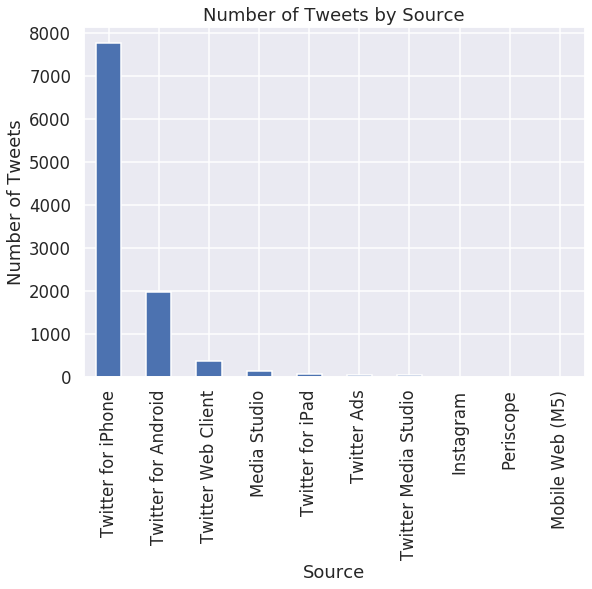

In [87]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.xlabel('Source')
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

## Question 3

Now that we have cleaned up the `source` field, let's look at which device Trump has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from this [link](https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years))

In [88]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)

<!-- BEGIN QUESTION -->

Now, use `sns.distplot` to overlay the distributions of Trump's 2 most frequently used web technologies over the years. Your final plot should look similar to the plot below:

<img src="images/source_years_q3.png" width="600px" />

<!--
BEGIN QUESTION
name: q3
points: 2
manual: true
-->

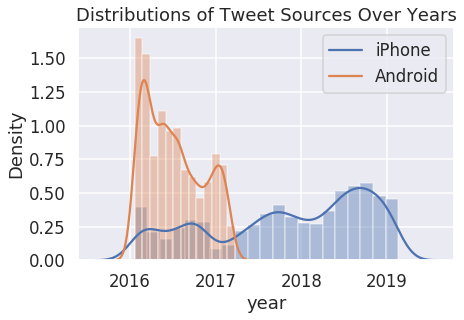

In [89]:
trump_android = trump[trump['source'] == 'Twitter for Android']['year']
trump_iphone = trump[trump['source'] == 'Twitter for iPhone']['year']

sns.distplot(trump_iphone)
sns.distplot(trump_android)

plt.legend(["iPhone", "Android"])
plt.title("Distributions of Tweet Sources Over Years")
plt.xlabel("year")
plt.show()

<!-- END QUESTION -->



## Question 4


Is there a difference between Trump's tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android device come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets).

In [90]:
for tweet in all_tweets[:3]:
    print(tweet['created_at'])

Wed Oct 12 14:00:48 +0000 2016
Wed Oct 12 13:46:43 +0000 2016
Wed Oct 12 12:59:05 +0000 2016


We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [91]:
trump['est_time'] = (
    trump['time'].dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head()

,time,text,source,retweet_count,year,est_time
id,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,Twitter for iPhone,24915,2016.778689,2016-10-12 09:00:48-05:00
786201435486781440,2016-10-12 13:46:43+00:00,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,Twitter for iPhone,22609,2016.778689,2016-10-12 08:46:43-05:00
786189446274248704,2016-10-12 12:59:05+00:00,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,Twitter for Android,18329,2016.778689,2016-10-12 07:59:05-05:00
786054986534969344,2016-10-12 04:04:47+00:00,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,Twitter for iPhone,18789,2016.778689,2016-10-11 23:04:47-05:00
786007502639038464,2016-10-12 00:56:06+00:00,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",Twitter for iPhone,7761,2016.778689,2016-10-11 19:56:06-05:00


### Question 4a

Add a column called `hour` to the `trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

* **Hint:** See the cell above for an example of working with [dt accessors](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor). You should use the `est_time` column to calculate the hour.

<!--
BEGIN QUESTION
name: q4a
points: 1
-->

In [92]:
trump['hour'] = trump['est_time'].dt.hour +trump['est_time'].dt.minute/60 + trump['est_time'].dt.second/60**2
trump


,time,text,source,retweet_count,year,est_time,hour
id,,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,Twitter for iPhone,24915,2016.778689,2016-10-12 09:00:48-05:00,9.013333
786201435486781440,2016-10-12 13:46:43+00:00,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,Twitter for iPhone,22609,2016.778689,2016-10-12 08:46:43-05:00,8.778611
786189446274248704,2016-10-12 12:59:05+00:00,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,Twitter for Android,18329,2016.778689,2016-10-12 07:59:05-05:00,7.984722
786054986534969344,2016-10-12 04:04:47+00:00,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,Twitter for iPhone,18789,2016.778689,2016-10-11 23:04:47-05:00,23.079722
786007502639038464,2016-10-12 00:56:06+00:00,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",Twitter for iPhone,7761,2016.778689,2016-10-11 19:56:06-05:00,19.935000
...,...,...,...,...,...,...,...
1052344365442588673,2018-10-16 23:43:42+00:00,"I will be interviewed tonight by Trish Regan on @FoxBusiness at 8:00 P.M., right after the great Lou Dobbs!",Twitter for iPhone,8053,2018.789041,2018-10-16 18:43:42-05:00,18.728333
1052340597900627968,2018-10-16 23:28:44+00:00,RT @FoxBusiness: TONIGHT: @POTUS talks 2020 election in an exclusive interview with @trish_regan. Don't miss the full interview on 'Trish R…,Twitter for iPhone,7013,2018.789041,2018-10-16 18:28:44-05:00,18.478889
1052270676982333442,2018-10-16 18:50:54+00:00,"WOW, John James is making headway in Michigan. We are bringing jobs back to the State, and the People of Michigan appreciate it. Debbie Stabenow has been no help, if anything, a major hindrance. John James is a star, I hope the voters see it. Polls are tightening!",Twitter for iPhone,26394,2018.789041,2018-10-16 13:50:54-05:00,13.848333


In [93]:
grader.check("q4a")

All tests passed!

<!-- BEGIN QUESTION -->

### Question 4b

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that Trump tweets on each device for the 2 most commonly used devices.  Your final plot should look similar to the following:

<img src="images/device_hour4b.png" width="600px" />

<!--
BEGIN QUESTION
name: q4b
points: 2
manual: true
-->

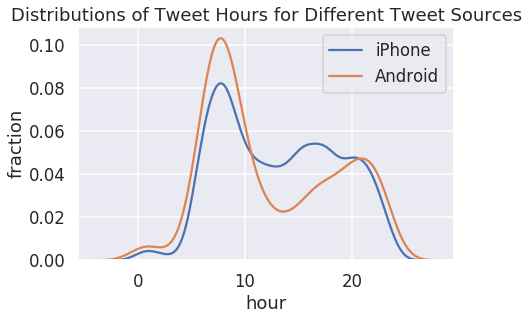

In [94]:
### make your plot here
trump_android = trump[trump['source'] == 'Twitter for Android']['hour']
trump_iphone = trump[trump['source'] == 'Twitter for iPhone']['hour']

sns.distplot(trump_iphone, hist = False)
sns.distplot(trump_android, hist = False)

plt.legend(["iPhone", "Android"])
plt.title("Distributions of Tweet Hours for Different Tweet Sources")
plt.xlabel("hour")
plt.ylabel("fraction")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4c

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Let's see if this information significantly changes our plot. Create a figure similar to your figure from question 4b, but this time, only use tweets that were tweeted before 2017. Your plot should look similar to the following:

<img src="images/device_hour4c.png" width="600px" />

<!--
BEGIN QUESTION
name: q4c
points: 2
manual: true
-->

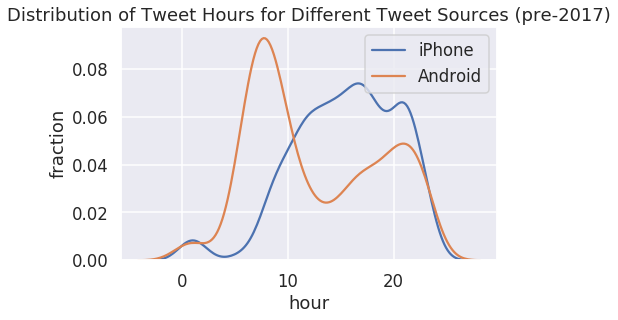

In [95]:
### make your plot here
trump_android = trump[trump['source'] == 'Twitter for Android'].query('year < 2017')['hour']
trump_iphone = trump[trump['source'] == 'Twitter for iPhone'].query('year < 2017')['hour']

sns.distplot(trump_iphone, hist = False)
sns.distplot(trump_android, hist = False)

plt.legend(["iPhone", "Android"])
plt.title("Distribution of Tweet Hours for Different Tweet Sources (pre-2017)")
plt.xlabel("hour")
plt.ylabel("fraction")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4d

During the campaign, it was theorized that Donald Trump's tweets from Android devices were written by him personally, and the tweets from iPhones were from his staff. Does your figure give support to this theory? What kinds of additional analysis could help support or reject this claim?

<!--
BEGIN QUESTION
name: q4d
points: 1
manual: true
-->

There is slight evidence for this scenario. In the cases pre 2017, we see the android tweets pretty consistent with the overall distribtion shown in 4b, with a peak in the morning around 8 and slight peak at 22. The iphone tweets from pre 2017 have a different distribution, tweeting throughout the day making it seem like it could be from a different source of people. Potentially it could be his staff tweeting throughout the day.

<!-- END QUESTION -->



---
# Part 3: Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [96]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! Each row contains a word and the *polarity* of that word, measuring how positive or negative the word is.

<!-- BEGIN QUESTION -->

## Question 5

The creators of VADER describe the tool’s assessment of polarity, or “compound score,” in the following way:

“The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.”

As you can see, VADER doesn't "read" sentences, but works by parsing sentences into words assigning a preset generalized score from their testing sets to each word separately. 

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training set of data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk. 

### Question 5a

Please score the sentiment of one of the following words:
- police
- order
- Democrat
- Republican
- gun
- dog
- technology
- TikTok
- security
- face-mask
- science
- climate change
- vaccine

What score did you give it and why? Can you think of a situation in which this word would carry the opposite sentiment to the one you’ve just assigned?
<!--
BEGIN QUESTION
name: q5a
points: 1
manual: true
-->

"Dog" would generally be a positive word with a score of 0.5 with the prevalence of dogs being pets and being accepted part of society. In the situation we are talking about police dogs regarding riots and BLM movement, this word can have a negative score. In this context is very important.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 5b
VADER aggregates the sentiment of words in order to determine the overall sentiment of a sentence, and further aggregates sentences to assign just one aggregated score to a whole tweet or collection of tweets. This is a complex process and if you'd like to learn more about how VADER aggregates sentiment, here is the info at this [link](https://github.com/cjhutto/vaderSentiment#introduction).

Are there circumstances (e.g. certain kinds of language or data) when you might not want to use VADER? What features of human speech might VADER misrepresent or fail to capture?

<!--
BEGIN QUESTION
name: q5b
points: 1
manual: true
-->

You would properly not want to use VADER when working with large amounts of texts with a lot of context and correlated words, as it would be less accurate and increase inaccuracy. It would also be inneffective in detecting sarcasm or any situation where people dont mean what they are exactly saying.

<!-- END QUESTION -->

### Question 5c

Read `vader_lexicon.txt` into a DataFrame called `sent`. The index of the DataFrame should be the words in the lexicon. `sent` should have one column named `polarity`, storing the polarity of each word.

* **Hint:** The `pd.read_csv` function may help here. Since the file is tab-separated, be sure to set `sep='\t'` in your call to `pd.read_csv`. 

<!--
BEGIN QUESTION
name: q5c
points: 1
-->

In [97]:
sent = pd.read_csv("vader_lexicon.txt", names= ["text", "polarity", "intensity", "score_matrix"],sep = '\t').set_index("text")[["polarity"]]
sent.head()

,polarity
text,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [98]:
grader.check("q5c")

All tests passed!

### Question 5d

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `trump` DataFrame to be the lowercased text of each tweet.

<!--
BEGIN QUESTION
name: q5d
points: 1
-->

In [99]:
trump["text"] = trump["text"].str.lower()
trump.head()

,time,text,source,retweet_count,year,est_time,hour
id,,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,pay to play politics. \n#crookedhillary https://t.co/wjsl8itvvk,Twitter for iPhone,24915,2016.778689,2016-10-12 09:00:48-05:00,9.013333
786201435486781440,2016-10-12 13:46:43+00:00,very little pick-up by the dishonest media of incredible information provided by wikileaks. so dishonest! rigged system!,Twitter for iPhone,22609,2016.778689,2016-10-12 08:46:43-05:00,8.778611
786189446274248704,2016-10-12 12:59:05+00:00,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,Twitter for Android,18329,2016.778689,2016-10-12 07:59:05-05:00,7.984722
786054986534969344,2016-10-12 04:04:47+00:00,thank you florida- a movement that has never been seen before and will never be seen again. lets get out &amp;… https://t.co/t9xm9wfdzi,Twitter for iPhone,18789,2016.778689,2016-10-11 23:04:47-05:00,23.079722
786007502639038464,2016-10-12 00:56:06+00:00,"join me thursday in florida &amp; ohio!\nwest palm beach, fl at noon:\nhttps://t.co/jwbznqhxg9\ncincinnati, oh this 7:30pm:\nhttps://t.co/5w2uhalpix",Twitter for iPhone,7761,2016.778689,2016-10-11 19:56:06-05:00,19.935000


In [100]:
grader.check("q5d")

All tests passed!

### Question 5e

Now, let's get rid of punctuation since it will cause us to fail to match words. Create a new column called `no_punc` in the `trump` DataFrame to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be *any character that isn't a Unicode word character or a whitespace character*. You may want to consult the Python documentation on regex for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

<!--
BEGIN QUESTION
name: q5e
points: 1
-->

In [102]:
# Save your regex in punct_re
punct_re = r'[^\w\s\[\]\\]|_'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ')
trump

,time,text,source,retweet_count,year,est_time,hour,no_punc
id,,,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,pay to play politics. \n#crookedhillary https://t.co/wjsl8itvvk,Twitter for iPhone,24915,2016.778689,2016-10-12 09:00:48-05:00,9.013333,pay to play politics \n crookedhillary https t co wjsl8itvvk
786201435486781440,2016-10-12 13:46:43+00:00,very little pick-up by the dishonest media of incredible information provided by wikileaks. so dishonest! rigged system!,Twitter for iPhone,22609,2016.778689,2016-10-12 08:46:43-05:00,8.778611,very little pick up by the dishonest media of incredible information provided by wikileaks so dishonest rigged system
786189446274248704,2016-10-12 12:59:05+00:00,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,Twitter for Android,18329,2016.778689,2016-10-12 07:59:05-05:00,7.984722,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years why didn t she do them
786054986534969344,2016-10-12 04:04:47+00:00,thank you florida- a movement that has never been seen before and will never be seen again. lets get out &amp;… https://t.co/t9xm9wfdzi,Twitter for iPhone,18789,2016.778689,2016-10-11 23:04:47-05:00,23.079722,thank you florida a movement that has never been seen before and will never be seen again lets get out amp https t co t9xm9wfdzi
786007502639038464,2016-10-12 00:56:06+00:00,"join me thursday in florida &amp; ohio!\nwest palm beach, fl at noon:\nhttps://t.co/jwbznqhxg9\ncincinnati, oh this 7:30pm:\nhttps://t.co/5w2uhalpix",Twitter for iPhone,7761,2016.778689,2016-10-11 19:56:06-05:00,19.935000,join me thursday in florida amp ohio \nwest palm beach fl at noon \nhttps t co jwbznqhxg9\ncincinnati oh this 7 30pm \nhttps t co 5w2uhalpix
...,...,...,...,...,...,...,...,...
1052344365442588673,2018-10-16 23:43:42+00:00,"i will be interviewed tonight by trish regan on @foxbusiness at 8:00 p.m., right after the great lou dobbs!",Twitter for iPhone,8053,2018.789041,2018-10-16 18:43:42-05:00,18.728333,i will be interviewed tonight by trish regan on foxbusiness at 8 00 p m right after the great lou dobbs
1052340597900627968,2018-10-16 23:28:44+00:00,rt @foxbusiness: tonight: @potus talks 2020 election in an exclusive interview with @trish_regan. don't miss the full interview on 'trish r…,Twitter for iPhone,7013,2018.789041,2018-10-16 18:28:44-05:00,18.478889,rt foxbusiness tonight potus talks 2020 election in an exclusive interview with trish regan don t miss the full interview on trish r
1052270676982333442,2018-10-16 18:50:54+00:00,"wow, john james is making headway in michigan. we are bringing jobs back to the state, and the people of michigan appreciate it. debbie stabenow has been no help, if anything, a major hindrance. john james is a star, i hope the voters see it. polls are tightening!",Twitter for iPhone,26394,2018.789041,2018-10-16 13:50:54-05:00,13.848333,wow john james is making headway in michigan we are bringing jobs back to the state and the people of michigan appreciate it debbie stabenow has been no help if anything a major hindrance john james is a star i hope the voters see it polls are tightening


In [103]:
grader.check("q5e")

All tests passed!

### Question 5f

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>690171032150237184</th>
      <td>0</td>
      <td>bigop1</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>1</td>
      <td>realdonaldtrump</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>2</td>
      <td>sarahpalinusa</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>3</td>
      <td>https</td>
    </tr>
    <tr>
      <th>690171032150237184</th>
      <td>4</td>
      <td>t</td>
    </tr>
  </tbody>
</table>

**Note that your DataFrame may look different from the one above.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the `trump` DataFrame, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

<!--
BEGIN QUESTION
name: q5f
points: 2
-->

In [114]:
tidy_format = trump['no_punc'].str.split(expand = True).stack().to_frame().reset_index().set_index("id").rename(columns = {"level_1": "num", 0: "word"})
tidy_format

,num,word
id,,
786204978629185536,0,pay
786204978629185536,1,to
786204978629185536,2,play
786204978629185536,3,politics
786204978629185536,4,crookedhillary
...,...,...
1052268011900555265,25,secretary
1052268011900555265,26,of
1052268011900555265,27,state


In [115]:
grader.check("q5f")

All tests passed!

### Question 5g

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hints:** 
* You will need to merge the `tidy_format` and `sent` tables and group the final answer.
* If certain words are not found in the `sent` table, set their polarities to 0.

<!--
BEGIN QUESTION
name: q5g
points: 2
-->

In [120]:
pty = tidy_format.merge(sent, how = "left", left_on = "word", right_on = "text", right_index = True).fillna(0).drop(columns = ["num"]).groupby("id").agg(sum)
trump['polarity'] = pty
trump

,time,text,source,retweet_count,year,est_time,hour,no_punc,polarity
id,,,,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,pay to play politics. \n#crookedhillary https://t.co/wjsl8itvvk,Twitter for iPhone,24915,2016.778689,2016-10-12 09:00:48-05:00,9.013333,pay to play politics \n crookedhillary https t co wjsl8itvvk,1.0
786201435486781440,2016-10-12 13:46:43+00:00,very little pick-up by the dishonest media of incredible information provided by wikileaks. so dishonest! rigged system!,Twitter for iPhone,22609,2016.778689,2016-10-12 08:46:43-05:00,8.778611,very little pick up by the dishonest media of incredible information provided by wikileaks so dishonest rigged system,-6.9
786189446274248704,2016-10-12 12:59:05+00:00,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,Twitter for Android,18329,2016.778689,2016-10-12 07:59:05-05:00,7.984722,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years why didn t she do them,1.8
786054986534969344,2016-10-12 04:04:47+00:00,thank you florida- a movement that has never been seen before and will never be seen again. lets get out &amp;… https://t.co/t9xm9wfdzi,Twitter for iPhone,18789,2016.778689,2016-10-11 23:04:47-05:00,23.079722,thank you florida a movement that has never been seen before and will never be seen again lets get out amp https t co t9xm9wfdzi,1.5
786007502639038464,2016-10-12 00:56:06+00:00,"join me thursday in florida &amp; ohio!\nwest palm beach, fl at noon:\nhttps://t.co/jwbznqhxg9\ncincinnati, oh this 7:30pm:\nhttps://t.co/5w2uhalpix",Twitter for iPhone,7761,2016.778689,2016-10-11 19:56:06-05:00,19.935000,join me thursday in florida amp ohio \nwest palm beach fl at noon \nhttps t co jwbznqhxg9\ncincinnati oh this 7 30pm \nhttps t co 5w2uhalpix,1.2
...,...,...,...,...,...,...,...,...,...
1052344365442588673,2018-10-16 23:43:42+00:00,"i will be interviewed tonight by trish regan on @foxbusiness at 8:00 p.m., right after the great lou dobbs!",Twitter for iPhone,8053,2018.789041,2018-10-16 18:43:42-05:00,18.728333,i will be interviewed tonight by trish regan on foxbusiness at 8 00 p m right after the great lou dobbs,3.1
1052340597900627968,2018-10-16 23:28:44+00:00,rt @foxbusiness: tonight: @potus talks 2020 election in an exclusive interview with @trish_regan. don't miss the full interview on 'trish r…,Twitter for iPhone,7013,2018.789041,2018-10-16 18:28:44-05:00,18.478889,rt foxbusiness tonight potus talks 2020 election in an exclusive interview with trish regan don t miss the full interview on trish r,-0.1
1052270676982333442,2018-10-16 18:50:54+00:00,"wow, john james is making headway in michigan. we are bringing jobs back to the state, and the people of michigan appreciate it. debbie stabenow has been no help, if anything, a major hindrance. john james is a star, i hope the voters see it. polls are tightening!",Twitter for iPhone,26394,2018.789041,2018-10-16 13:50:54-05:00,13.848333,wow john james is making headway in michigan we are bringing jobs back to the state and the people of michigan appreciate it debbie stabenow has been no help if anything a major hindrance john james is a star i hope the voters see it polls are tightening,5.2


In [121]:
grader.check("q5g")

All tests passed!

Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, run the cells below to see the most positive and most negative tweets from Trump in your dataset:

In [122]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

In [123]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

<!-- BEGIN QUESTION -->

## Question 5h

Read the 5 most positive and 5 most negative tweets. Do you think these tweets are accurately represented by their polarity scores?

<!--
BEGIN QUESTION
name: q5h
points: 1
manual: true
-->

Yes the 5 most negative tweets are about negative topics such as ICE, drugs and illegal activity. The 5 most positive tweets are Trump thanking, congratulating and complimenting people.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 6

Now, let's try looking at the distributions of sentiments for tweets containing certain keywords.

### Question 6a

In the cell below, create a single plot showing both the distribution of tweet sentiments for tweets containing `nytimes`, as well as the distribution of tweet sentiments for tweets containing `fox`.

Be sure to label your axes and provide a title and legend. Be sure to use different colors for `fox` and `nytimes`.

<!--
BEGIN QUESTION
name: q6a
points: 1
manual: true
-->

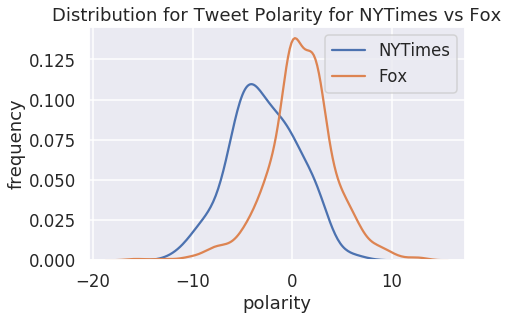

In [137]:
nytimes = trump[trump["text"].str.contains("nytimes")]["polarity"]
fox = trump[trump["text"].str.contains("fox")]["polarity"]

sns.distplot(nytimes, hist = False)
sns.distplot(fox, hist = False)

plt.xlabel("polarity")
plt.ylabel("frequency")
plt.title("Distribution for Tweet Polarity for NYTimes vs Fox")
plt.legend(["NYTimes", "Fox"])
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 6b
Comment on what you observe in the plot above. Can you find another pair of keywords that lead to interesting plots? Describe what makes the plots interesting. (If you modify your code in 6a, remember to change the words back to `nytimes` and `fox` before submitting for grading).

<!--
BEGIN QUESTION
name: q6b
points: 1
manual: true
-->

The Fox distribution has a general higher polarity compared to NYTimes. The NyTimes and Fox distributions are unimodal. The NYTimes distribution has a mean around -5 and has a slight right skew while the Fox distribution has a center around 0 and is fairly symmetrical. Fox has a general polarity of which is higher to NYTimes.

We can see a difference between keywords "mexican" and "christian" with christians also having a higher mean, indicating that Trump had more positive tweet regarding christians.

<!-- END QUESTION -->



## Question 7

Now, let's see whether there's a difference in sentiment for tweets with hashtags and those without.

### Question 7a
First, we'll need to write some regex that can detect whether a tweet contains a hashtag or a link. We say that:

- A tweet is a retweet if it has the string 'rt' anywhere in the tweet if it is preceeded and followed by a non-word character (the start and end of the string count as non-word characters).
- A tweet has a hashtag if it has the character '#' anywhere in the tweet followed by a letter.
- A tweet contains a link or a picture if it has `http` anywhere in the tweet

(You can check out Trump's Twitter for why these criteria are true).

In the cell below, assign `rt_re` to a regex pattern that identifies retweets and `hash_link_re` to a regex pattern that identifies tweets with hashtags or links.

**Hints**: 
- Be sure to precede your regex pattern with `r` to make it a raw string (Ex: `r'pattern'`). To find out more, you can read the first paragraph of the [documentation](https://docs.python.org/2/library/re.html).
- You may find using regex word boundaries helpful for one of your patterns. 

<!--
BEGIN QUESTION
name: q7a
points: 2
-->

In [138]:
rt_re = r'\brt\b'
hash_link_re = r'#\b|http\b'

In [139]:
grader.check("q7a")

All tests passed!

### Question 7b
Let's see whether there's a difference in sentiments for tweets with hashtags/links and those without. 

*Note: You will get a UserWarning error when running the below cell. For the purpose of this homework, you can ignore it.*

Run the cell below to see a distribution of tweet sentiments based on whether a tweet contains a hashtag or link.

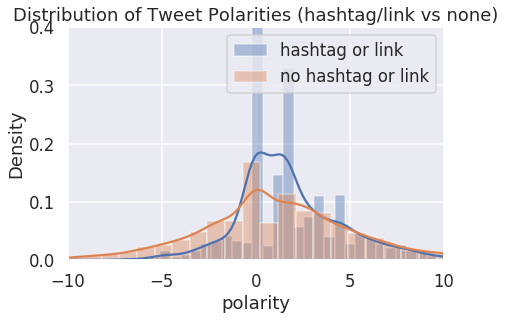

In [142]:
sns.distplot(trump[trump['text'].str.contains(hash_link_re)]['polarity'],label='hashtag or link');
sns.distplot(trump[~trump['text'].str.contains(hash_link_re)]['polarity'],label='no hashtag or link');
plt.xlim(-10, 10);
plt.ylim(0, 0.4);
plt.title('Distribution of Tweet Polarities (hashtag/link vs none)');
plt.legend();

<!-- BEGIN QUESTION -->

What do you notice about the distributions? Answer in 1-2 sentences.

<!--
BEGIN QUESTION
name: q7b
points: 1
manual: true
-->

The distribution of no hashtag or link has a mean around 0 and is fairly symmetrical. The distribution of hashtag or linked tweets has a mean slightly larger than 0 and has a right skew. Thus we can conlude that the hashtagged or linked data has a higher polarity.

<!-- END QUESTION -->



## Congratulations! You have finished Homework 4!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [145]:
grader.check_all()

q1:

    All tests passed!
    

q2:

    All tests passed!
    

q4a:

    All tests passed!
    

q5c:

    All tests passed!
    

q5d:

    All tests passed!
    

q5e:

    All tests passed!
    

q5f:

    All tests passed!
    

q5g:

    All tests passed!
    

q7a:

    All tests passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [146]:
# Save your notebook first, then run this cell to export your submission.
grader.export("hw4.ipynb")